In [1]:
'''Kickstarter is an American public-benefit corporation[2] based in Brooklyn, 
New York, that maintains a global crowdfunding platform focused on creativity 
and merchandising.[3] The company's stated mission is to "help bring creative 
projects to life" and we have some '''

'Kickstarter is an American public-benefit corporation[2] based in Brooklyn, \nNew York, that maintains a global crowdfunding platform focused on creativity \nand merchandising.[3] The company\'s stated mission is to "help bring creative \nprojects to life" and we have some '

In [2]:
'''The datastet contains the blurbs or short description of 215513 projects 
runned along 2017, all written in english and all labeled with "successful"
or "failed", if they get the money or not, respectively. From those texts 
you can train linguistics models for description, and even embeddings relative to
the case.'''

'The datastet contains the blurbs or short description of 215513 projects \nrunned along 2017, all written in english and all labeled with "successful"\nor "failed", if they get the money or not, respectively. From those texts \nyou can train linguistics models for description, and even embeddings relative to\nthe case.'

In [3]:
#Importing the Data Visualisation and Data Manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Importing the data
data = pd.read_csv("df_text_eng.csv")



#Seeing the how it looks like
data.head()

,Unnamed: 0,blurb,state
0,1,"Using their own character, users go on educati...",failed
1,2,"MicroFly is a quadcopter packed with WiFi, 6 s...",successful
2,3,"A small indie press, run as a collective for a...",failed
3,4,Zylor is a new baby cosplayer! Back this kicks...,failed
4,5,Hatoful Boyfriend meet Skeletons! A comedy Dat...,failed


In [4]:
#Preprocessing of the data(which includes cleaning ,labelling etc) 

#Removing the Unnamed: 0 column as it is of no use 
del data['Unnamed: 0']


#Importing the library
from io import StringIO


#Making new column and factorize the state of the project into numerical values such as 0 or 1 and not 
#like failed or passed like before as machine learning wants only the numerical data
data['state_id'] = data['state'].factorize()[0]



#See the output carefully
#At the end it sort the values with respect to state_id
state_id_df = data[['state', 'state_id']].drop_duplicates().sort_values('state_id')
print(state_id_df)
print("\n")

#See the output carefully
state_to_id = dict(state_id_df.values)
print(state_to_id)
print("\n")

#Generating the id value
id_to_state = dict(state_id_df[['state_id', 'state']].values)
print(id_to_state)
print("\n")


data.head()

        state  state_id
0      failed         0
1  successful         1


{'failed': 0, 'successful': 1}


{0: 'failed', 1: 'successful'}




,blurb,state,state_id
0,"Using their own character, users go on educati...",failed,0
1,"MicroFly is a quadcopter packed with WiFi, 6 s...",successful,1
2,"A small indie press, run as a collective for a...",failed,0
3,Zylor is a new baby cosplayer! Back this kicks...,failed,0
4,Hatoful Boyfriend meet Skeletons! A comedy Dat...,failed,0


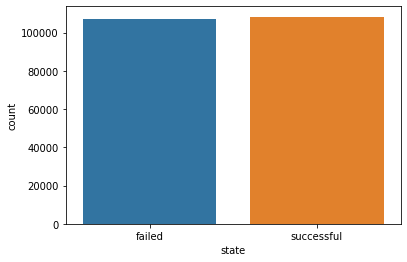

In [5]:
#Count plot of the number of sate
sns.countplot(data['state'])

In [6]:
#importing the regular expression library
#And we are removing the punctuations from the text
import re
def clean(text):
    text = str(text)
    text = re.findall(r'\w+', text)#Regular Expressions for punctuation 
    return ' '.join(text)
data['blurb'] = data['blurb'].apply(lambda x: clean(x))

In [7]:
#data.head()
#This is for the understanding what findall function did
tex="This is one . two is fine. three id very bas!!!."
tex=re.findall(r'\w+',tex)
print(tex)

['This', 'is', 'one', 'two', 'is', 'fine', 'three', 'id', 'very', 'bas']


In [8]:
#You will now see the state_id and all 
data.head()

,blurb,state,state_id
0,Using their own character users go on educatio...,failed,0
1,MicroFly is a quadcopter packed with WiFi 6 se...,successful,1
2,A small indie press run as a collective for au...,failed,0
3,Zylor is a new baby cosplayer Back this kickst...,failed,0
4,Hatoful Boyfriend meet Skeletons A comedy Dati...,failed,0


In [9]:
#Splitting the data using the librarie sklearn which has every Ml Model
from sklearn.model_selection import train_test_split

#Making text into word vectors because machine learning needs some numerical representation
from sklearn.feature_extraction.text import TfidfVectorizer

#Splitting of the data  and we put 80% data in training and 20% data in testing 
x_train, x_test, y_train, y_test = train_test_split(data['blurb'], data['state'], train_size=0.8)


#First fitting with your data and then transform
#You fit and transform both with your training data
#Transforming the data
vectorizer = TfidfVectorizer().fit(x_train)
x_train_v = vectorizer.transform(x_train)
x_test_v  = vectorizer.transform(x_test)

In [10]:
#Now comes to the machine learning models and all


#Linear Classifier
from sklearn.linear_model import LogisticRegression, SGDClassifier


#Support Vector Machins
from sklearn.svm import LinearSVC


#It is very imporatant to see the score of the every metrics 
#It involves accuracy,precision,recall ,f1-score
from sklearn.metrics import classification_report

#Bayesian Classsifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

#Importing the time library to calculate the current time
#To check how much time takes by an algorithm
from time import time

#Making of the list
entries = []

#Making of the function
def train():
    models = {#It is the dictionary of classifiers having key value pairs
        "LogisticRegression": LogisticRegression(),
        "SGDClassifier": SGDClassifier(),
        "Multinomial":MultinomialNB(),
        "LinearSVC": LinearSVC(),
    }
    for model in models:
        print("training model"+model)
        start = time()
        models[model].fit(x_train_v, y_train)
        end = time()
        print("trained in {} secs".format(end-start))
        y_pred = models[model].predict(x_test_v)
        entries.append((model,accuracy_score(y_test, y_pred)))#Appending one tuple to the list
    print(entries)    

In [11]:
#Calling of the function
train()

training modelLogisticRegression


/home/tarun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


trained in 4.987028121948242 secs
training modelSGDClassifier
trained in 0.6982629299163818 secs
training modelMultinomial
trained in 0.5671567916870117 secs
training modelLinearSVC
trained in 3.6932687759399414 secs
[('LogisticRegression', 0.6771454423126001), ('SGDClassifier', 0.6702085701691297), ('Multinomial', 0.6709277776488876), ('LinearSVC', 0.6615084796881887)]


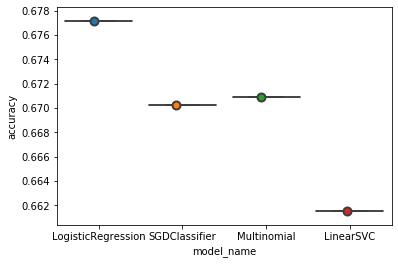

In [12]:
#Now plotting the accuracies simply

#Making of the dataframe using the dictionary
cv_df = pd.DataFrame(entries, columns=['model_name','accuracy'])

#Importing the seaborn libraries
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

/home/tarun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


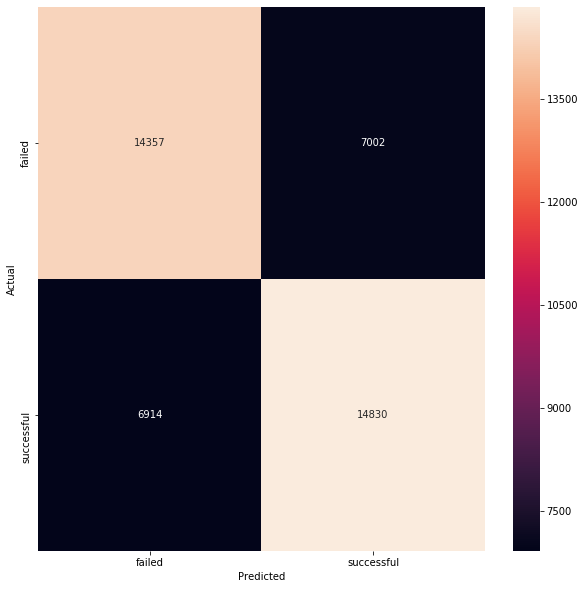

In [13]:
#Building for the Machine learning Model 

#Building Logistic Regression
model = LogisticRegression()

#Fitting the model with the training data
model.fit(x_train_v, y_train)

#Predicting the value with the test data 
y_pred = model.predict(x_test_v)


#import the confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)


#Plotting the data
fig, ax = plt.subplots(figsize=(10,10))
pp=sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=state_id_df.state.values, yticklabels=state_id_df.state.values)
bottom,top=pp.get_ylim();
pp.set_ylim(bottom+0.5,top-0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [16]:
#print the classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      failed       0.67      0.67      0.67     21359
  successful       0.68      0.68      0.68     21744

    accuracy                           0.68     43103
   macro avg       0.68      0.68      0.68     43103
weighted avg       0.68      0.68      0.68     43103

